In [ ]:
import numpy as np
import matplotlib.pyplot as plt

point1 = np.array((0, 0, 0))
point2 = np.array((1, 1, 1))

dist = np.linalg.norm(point1 - point2)
print(dist)

1.7320508075688772


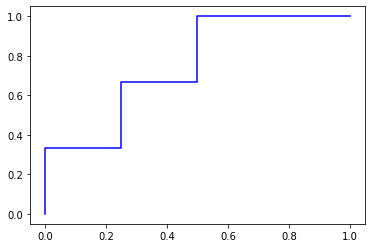

In [ ]:
plt.plot([0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 1],[0, 1/6, 2/6, 2/6, 3/6, 4/6, 4/6, 5/6, 1, 1, 1],color='blue')

Programming

In [ ]:
Xgrid = np.arange(-2, 2.1, 0.1)
Ygrid = np.arange(-2, 2.1, 0.1)

In [ ]:
grid = np.zeros((41*41, 3))
i = 0
j = 0
num1 = 0
num2 = 0
while(j<=41*41-1):
  num1 = int(j/41)
  num2 = int(j%41)
  grid[j, 0] = Xgrid[num1]
  grid[j, 1] = Xgrid[num2]
  j+=1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/CS760/hw3/data/D2z.txt', 'r') as f: 
    data1 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1)

Mounted at /content/drive


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(data1[:, 0:2], data1[:, 2])
print(model1)

KNeighborsClassifier(n_neighbors=1)


In [ ]:
grid[:, 2] = model1.predict(grid[:, 0:2])

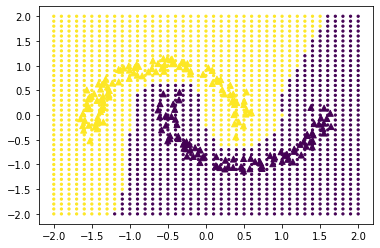

In [ ]:
plt.scatter(grid[:, 0], grid[:, 1],c = grid[:, 2], s = 5)
plt.scatter(data1[:, 0], data1[:, 1], c = data1[:, 2], marker = '^')

1.

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/CS760/hw3/data/emails.csv', 'r') as f: 
    dataEmail = np.genfromtxt(f, dtype='f4', delimiter=',',skip_header=1)
    np.shape(dataEmail)

In [ ]:
X1 = dataEmail[:, 1:-1]
y1 = dataEmail[:, -1]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
i = 0
for train_index , test_index in kf.split(X1, y1):
    X_train , X_test = X1[train_index,:],X1[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]

    model2 = KNeighborsClassifier(n_neighbors = 1)
    model2.fit(X_train,y_train)
    pred_values = model2.predict(X_test)
    
    print('Fold ', i)
    i+=1
    #acc = accuracy_score(pred_values , y_test)
    print('Accuracy: %.3f' % accuracy_score(y_test, pred_values))
    print('Precision: %.3f' % precision_score(y_test, pred_values))
    print('Precision: %.3f' % recall_score(y_test, pred_values))


Fold  0
Accuracy: 0.825
Precision: 0.654
Precision: 0.818
Fold  1
Accuracy: 0.853
Precision: 0.686
Precision: 0.866
Fold  2
Accuracy: 0.862
Precision: 0.721
Precision: 0.838
Fold  3
Accuracy: 0.851
Precision: 0.716
Precision: 0.816
Fold  4
Accuracy: 0.775
Precision: 0.606
Precision: 0.758


2. 

In [60]:
def sig(x):
  if x>500:
    return 1
  if x < -500:
    return 0
  return 1/(1 + np.exp(-x))

In [81]:
def gradL(X, theta, yvar):
  res = 0
  i = 0
  for row in X:
    y = yvar[i]
    res+=-y*(1-sig(np.dot(theta, row)))*row+(1-y)*sig(np.dot(theta, row))*row
    i+=1
  return res

In [104]:
j = 0
for train_index , test_index in kf.split(X1, y1):
    X_train , X_test = X1[train_index,:],X1[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]

    theta1 = np.zeros(3000)
    eta = 0.05
    j = 0
    while j<=1000:
      theta1 = theta1 - eta*gradL(X_train, theta1, y_train)
      j+=1

    print('Fold ', j)
    j+=1

    i=0
    c00 = 0
    c01 = 0
    c10 = 0
    c11 = 0

    for row in X_test:
      if sig(np.dot(theta1, row)) > 0.5:
        if y_test[i] == 1:
          c11+=1;
        else:
          c10+=1;
      else:
        if y_test[i] == 0:
          c00+=1;
        else:
          c01+=1;
      i+=1
    print('Accuracy: ' , (c11+c00)/1000)
    print('Precision: ' , c11/(c11+c10))
    print('Recall: ' , c11/(c11+c01))


Fold  0
Accuracy:  0.59
Precision:  0.4074074074074074
Recall:  0.9649122807017544
Fold  0
Accuracy:  0.895
Precision:  0.8307692307692308
Recall:  0.779783393501805
Fold  0
Accuracy:  0.894
Precision:  0.84765625
Recall:  0.7640845070422535
Fold  0
Accuracy:  0.872
Precision:  0.8738738738738738
Recall:  0.6598639455782312
Fold  0
Accuracy:  0.848
Precision:  0.7789855072463768
Recall:  0.7026143790849673


4. 

In [106]:
for k in [1, 3, 5, 7, 10]:
  acc = 0
  for train_index , test_index in kf.split(X1, y1):
    X_train , X_test = X1[train_index,:],X1[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]

    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    i+=1

    acc += accuracy_score(pred_values , y_test)
  print(acc/5)

0.8332
0.8422000000000001
0.8408
0.8462
0.8556000000000001


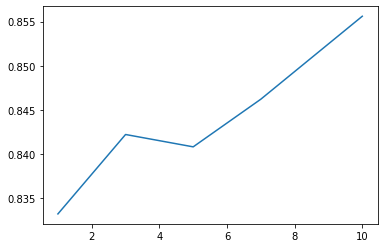

In [107]:
plt.plot([1, 3, 5, 7, 10], [0.8332, 0.8422, 0.8408, 0.8462, 0.8556])

5. 

In [152]:
from sklearn.metrics import roc_curve
X_train , X_test = X1[0:4000,:],X1[4001:5000,:]
y_train , y_test = y1[0:4000] , y1[4001:5000]

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
pred_values = model.predict(X_test)
y_probs = model.predict_proba(X_test)

In [153]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs[:, 1])

In [154]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)

In [155]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs[:, 1])

Text(0, 0.5, 'True Positive Rate')

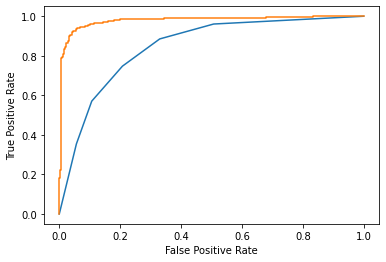

In [156]:
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')